In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.bn_vs_bn as bnvsbn
import networkx as nx
import pandas as pd
import numpy as np

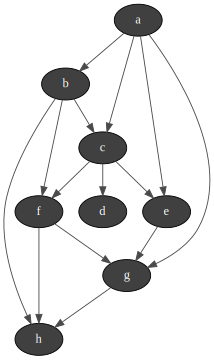

In [2]:
bn = gum.randomBN(n=8, names='abcdefgh', ratio_arc=2)
gnb.show(bn)

In [34]:
def get_mean_constraint(bn):
    G = nx.DiGraph()
    G.add_nodes_from(bn.nodes())
    G.add_edges_from(bn.arcs())
    constraints = np.nan_to_num([v for n, v in dict(nx.constraint(G)).items()])
    return np.mean(constraints)

get_mean_constraint(bn)

0.35180121527777775

In [4]:
def get_mean_effeciency(bn):
    G = nx.DiGraph()
    G.add_nodes_from(bn.nodes())
    G.add_edges_from(bn.arcs())
    
    esize = nx.effective_size(G)
    effeciencies = np.nan_to_num([v / G.degree(n) for n, v in esize.items()])
    return np.mean(effeciencies)
get_mean_effeciency(bn)

0.49256944444444445

In [11]:
def get_s_metric(bn):
    G = nx.DiGraph()
    G.add_nodes_from(bn.nodes())
    G.add_edges_from(bn.arcs())
    
    return nx.s_metric(G, normalized=False)
get_s_metric(bn)

204.0

In [14]:
def get_mean_similarity(bn):
    G = nx.DiGraph()
    G.add_nodes_from(bn.nodes())
    G.add_edges_from(bn.arcs())
    return pd.DataFrame(nx.simrank_similarity(G)).mean().mean()

get_mean_similarity(bn)

0.29735781250000004

In [20]:
def get_mean_nr_similarities(bn):
    G = nx.DiGraph()
    G.add_nodes_from(bn.nodes())
    G.add_edges_from(bn.arcs())
    return pd.DataFrame(nx.simrank_similarity(G)).astype(bool).sum(axis=0).mean()

get_mean_nr_similarities(bn)

5.5

In [29]:
def get_mean_degrees(bn):
    G = nx.DiGraph()
    G.add_nodes_from(bn.nodes())
    G.add_edges_from(bn.arcs())
    return np.mean([v for x,v in dict(G.out_degree()).items()])

get_mean_degrees(bn)

1.75